In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import cmath as cm
import pathlib
sys.path.insert(0, '/Users/sam/PycharmProjects/Quantum-Control/NewModule')
from arc import *  # Import ARC (Alkali Rydberg Calculator)

On va juste calculer le défaut quantique de la série G en prenant les niveaux G auxquels on a accès depuis le site du NIST. Après il s'agira d'utiliser la formule $E=E_0+W=E_I-\frac{R_y}{(n-\delta_l)^2}$ et aussi déconstruire $\delta_l$ en différents $\delta_0,\delta_2,\delta_4$.

In [2]:
en = np.array([44875.95 ,48202.2 ,  48394.3  , 48540.1,48653.7,48743.4]) #cm-1
n = np.array([5,10,11,12,13,14]) # array of quantum number n
ionization_energy = 49305.9240 #cm-1
Rydberg_constant = 109735.8137
neg_en = en - ionization_energy


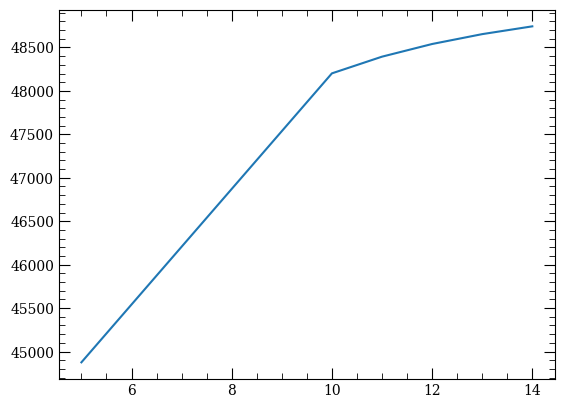

In [3]:
# ici on a tracé Ry/(n-delta_l)^2
plt.plot(n,en)
plt.show()

La formule est $\delta = n - \sqrt{\frac{Ry}{E-E_I}}$.

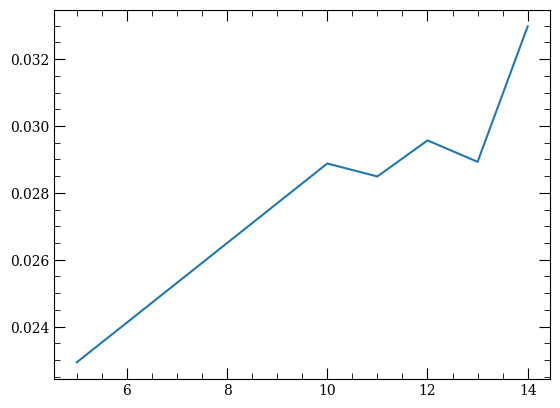

In [4]:
delta_n = np.zeros(len(en))

x = Rydberg_constant/neg_en
y = np.zeros(len(en))
for i in range(len(n)):
    y[i] = np.sqrt(-x[i])
delta_n = n - y
plt.plot(n,delta_n)
plt.show()



Paramètres optimisés pour l=4 :
delta_0 = 0.136607
delta_2 = -42.205386
delta_4 = 5729.650776
delta_6 = -303414.208471
delta_8 =  4494004.879586


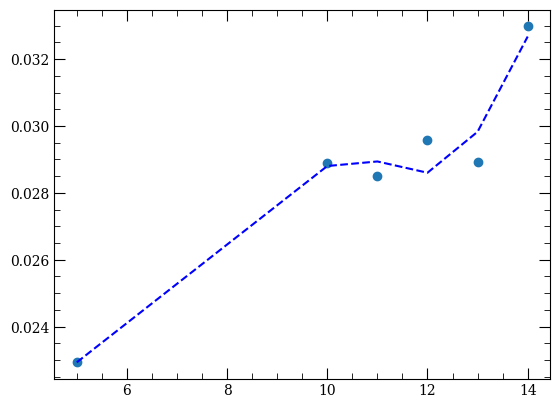

In [5]:
def ritz_rydberg(n, delta_0, delta_2, delta_4, delta_6, delta_8):
    return delta_0 + delta_2 / (n - delta_0) ** 2 + delta_4 / (n - delta_0) ** 4 + delta_6/(n - delta_0) ** 6 + delta_8/(n - delta_0) ** 8
import scipy.optimize as opt
p0 = [0.1, 1.0, 0.01,1.0,1]  # Valeurs initiales pour delta_0, delta_2, delta_4
params, covariance = opt.curve_fit(ritz_rydberg, n, delta_n, p0=p0)
delta_0_opt, delta_2_opt, delta_4_opt, delta_6_opt, delta_8_opt = params
print(f"Paramètres optimisés pour l=4 :")
print(f"delta_0 = {delta_0_opt:.6f}")
print(f"delta_2 = {delta_2_opt:.6f}")
print(f"delta_4 = {delta_4_opt:.6f}")
print(f"delta_6 = {delta_6_opt:.6f}")
print(f"delta_8 = {delta_8_opt: .6f}")

delta_fit = ritz_rydberg(n, delta_0_opt, delta_2_opt, delta_4_opt, delta_6_opt,delta_8_opt)
plt.scatter(n,delta_n)
plt.plot(n,delta_fit,label="Fit Ritz-Rydberg", linestyle='--', color='blue')

Paramètres optimisés pour l=4 :
delta_0 = 0.035203
delta_2 = -0.849441
delta_4 = 13.488117


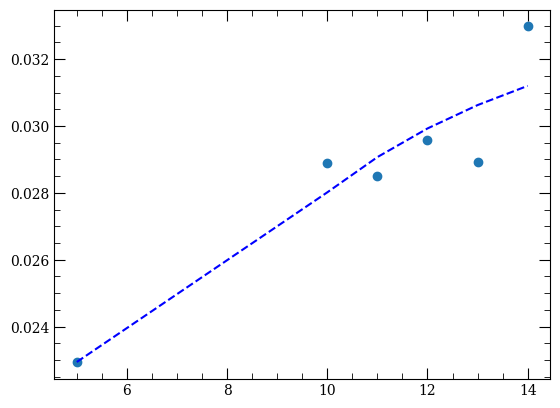

In [9]:
def ritz_rydberg(n, delta_0, delta_2, delta_4):
    return delta_0 + delta_2 / (n - delta_0) ** 2 + delta_4 / (n - delta_0) ** 4
import scipy.optimize as opt
p0 = [0.1, 1.0, 0.01]  # Valeurs initiales pour delta_0, delta_2, delta_4
params, covariance = opt.curve_fit(ritz_rydberg, n, delta_n, p0=p0)
delta_0_opt, delta_2_opt, delta_4_opt = params
print(f"Paramètres optimisés pour l=4 :")
print(f"delta_0 = {delta_0_opt:.6f}")
print(f"delta_2 = {delta_2_opt:.6f}")
print(f"delta_4 = {delta_4_opt:.6f}")

delta_fit = ritz_rydberg(n, delta_0_opt, delta_2_opt, delta_4_opt)
plt.scatter(n,delta_n)
plt.plot(n,delta_fit,label="Fit Ritz-Rydberg", linestyle='--', color='blue')